In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

In [61]:
# Import model from client
loaded_model = load_model("model1.keras")
loaded_model

In [62]:
# Show model details
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 500)               3000      
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 batch_normalization (Batch  (None, 250)               1000      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 125)               31375     
                                                                 
 dense_3 (Dense)             (None, 1)                 126       
                                                             

In [63]:
# Re-import randomly splitted data frames (equal sources for various tests)
import pandas as pd
df_part1 = pd.read_csv('df_part1.csv')
#df_part1.head()

In [64]:
# Drop unneccesary colums
df_part1 = df_part1.drop(['Failure Type', 'Target', 'Type', 'Product ID', 'UDI', 'Unnamed: 0'], axis=1)
#df_part1.head()

In [65]:
# Split dataset into train and testdata
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_part1, train_size=0.8)
#df_train.shape

In [66]:
# Define feature and target names
feature_names = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
target_names = ['Failure Type Cat']

In [67]:
# Convert features for training to tensor
features_train = df_train[feature_names]
#tf.convert_to_tensor(features_train)

In [68]:
# Convert features for testing to tensor
features_test = df_test[feature_names]
#tf.convert_to_tensor(features_test)

In [69]:
# Convert target for training to tensor
target_train = df_train[target_names]
#tf.convert_to_tensor(target_train)

In [70]:
# Convert target for testing to tensor
target_test = df_test[target_names]
#tf.convert_to_tensor(target_test)

In [79]:
# Predict behaviour based on trained model
import numpy as np
target_pred = loaded_model.predict(features_test).astype('int64')
target_pred[:10]

21/21 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [81]:
# Check accuracy of model
from sklearn.metrics import accuracy_score
acc = accuracy_score(target_test, target_pred)
print(f'The accuracy is {acc*100:.2f}%.')

The accuracy is 1.65%.


In [82]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, target_pred)
cm

array([[  9,   0,   0,   0,   0,   0],
       [634,   2,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0],
       [  7,   1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0]])

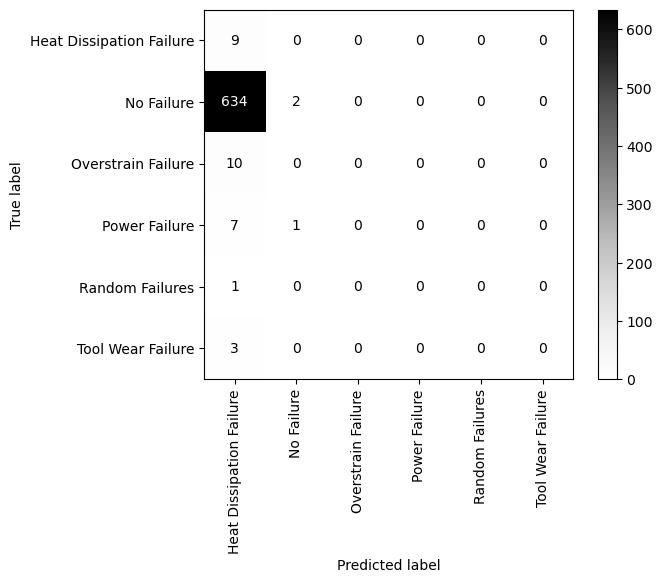

In [83]:
# Visualize the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure'])
disp.plot(cmap='Greys')
plt.xticks(rotation=90)
plt.show()